In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy
from scipy.interpolate import interp1d
from scipy.stats import zscore
from scipy.signal import find_peaks

What I need to do:

 1. Find a way to identify the most prominent peaks so to determine the coordinates of the D-peak, G-peak and the LFP peak as well as any other unexpected ones


 2. Fit gaussian/Lorentzian curves to the initial LFP graphs in order to obtain decent and presentable image for the intro to the dissertation.


 3. Manage the method to remove the cosmic rays peaks with coding either gradient or z-score could be used, check the function and maybe add an if statement to choose between which could be used 

In [24]:
x,y = np.loadtxt("LFP 5%int 1st run.txt", unpack = True)


In [25]:
def plotting(file,num,threshold):
    '''
    Funciton used to plot the data of the Raman Spectroscopy, it intakes the name of the .txt file and splits it
    in x and y axis data to plot. also the num input is to define whether the y-axis is scaled by log10 or not
    '''
    
    x,y = np.loadtxt(file, unpack = True)
    
    # Calculate z-scores
    z_scores = zscore(y)
    
    # Create a mask for values within the z-score threshold
    mask = np.abs(z_scores) < threshold

    # Filter data based on the mask
    filtered_x = x[mask]
    filtered_y = y[mask]

    # Create an interpolation function using linear interpolation
    interp_func = interp1d(filtered_x, filtered_y, kind='linear', fill_value='extrapolate')

    # Extrapolate missing values
    ex_y = interp_func(x)

    
    if 10 == num :
        
        plt.plot(x,np.log10(ex_y),)
        plt.xlabel("Raman shift cm$^{-1}$")
        plt.ylabel("Intensity (counts)")
        plt.title(file)
        plt.legend([file])
        plt.grid(True)
    else:
        plt.plot(x,ex_y,)
        plt.xlabel("Raman shift cm$^{-1}$")
        plt.ylabel("Intensity (counts)")
        plt.title(file)   
        plt.legend([file])
        plt.grid(True)
    
    print(ex_y)
    return

In [26]:
g1 = "LFP 5%int 1st run.txt"
g2 = "LFP 5%int 2nd run 2nd spot.txt"
g3 = "LFP 5%int 3rd run 3rd spot.txt"
g4 = "LFP 5%int 4th run 4th spot.txt"
g5 = "LFP 5%int 5th run 5th spot.txt"
g6 = "LFP 5%int 6th run 6th spot.txt"
g7 = "LFP 5%int 7th run 7th spot.txt"
g8 = "LFP 5%int 8th run 8th spot.txt"
g9 = "LFP 5%int 9th run 9th spot.txt"
g10 = "LFP 5%int 10th run 10th spot.txt"

[117.325   96.3743  87.9806 ... 310.484  270.513  301.497 ]


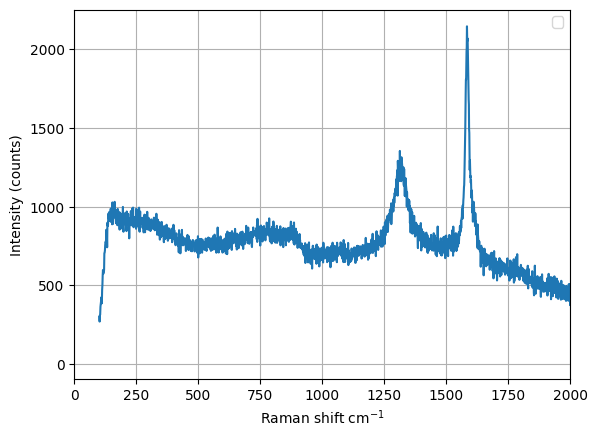

In [5]:
plt.xlim(0,2000)
h = plotting('trial graphite 10% int.txt',0,40)
plt.title('')
plt.legend("")

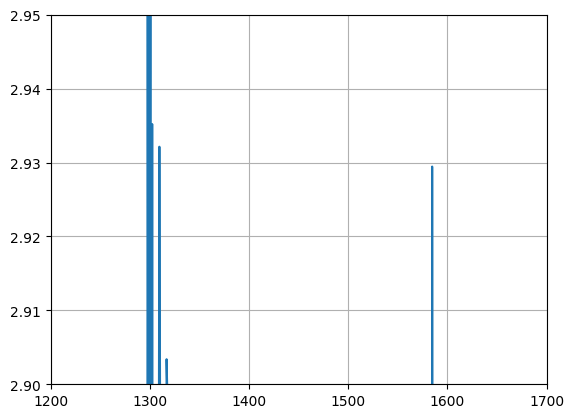

In [100]:
'''
zscore checking to see whether the second cosmic ray peak at a lower value is higher or lower than my dominant 
peak so I could adjust the threshold of the zscore, but it is lower so I guess I could try to check the gradient
and see if it is within certain norms that i would like to
'''

x,y = np.loadtxt("LFP 5%int 7th run 7th spot.txt", unpack = True)
    
# Calculate z-scores
z_scores = zscore(y)
z_s = np.abs(z_scores)
mask = (z_s <= 3)

# Filter data based on the mask
f_x = x[mask]
f_y = z_s[mask]


plt.plot(f_x,f_y)
plt.xlim(1200,1700)
plt.ylim(2.9,2.95)
plt.grid()

remove cosmic ray using coding, maybe check gradient or sth to remove it. 

[905.083 762.617 770.88  ... 430.244 465.639 350.27 ]


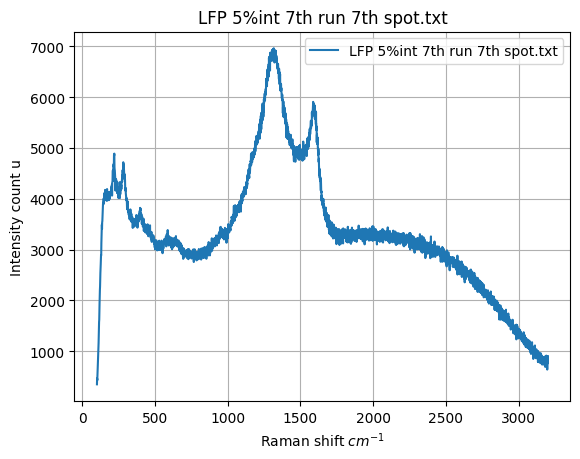

In [101]:
spot_7 = plotting(g7,0,2.929)

[ 884.144  955.379 1026.46  ...  585.497  467.864  441.171]
[821.283 771.001 938.467 ... 223.994 190.691 168.486]
[624.351 498.643 448.292 ... 645.381 552.127 496.597]
[1014.03   963.747  980.36  ...  530.044  507.769  414.561]
[787.761 791.952 770.884 ... 652.023 547.683 447.817]
[574.077 615.981 615.887 ... 545.591 390.267 434.532]
[905.083 762.617 770.88  ... 430.244 465.639 350.27 ]
[1210.96  1227.72  1332.28  ...  614.315  498.896  523.186]
[1035.01   980.539 1085.13  ...  632.086  589.834  507.691]
[1470.76  1433.04  1545.95  ...  638.711  496.68   410.125]


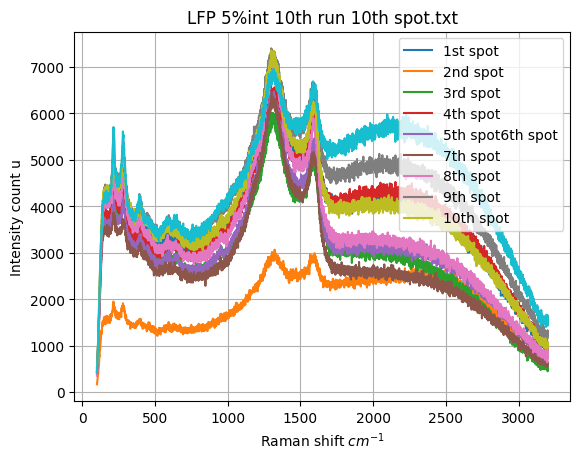

In [102]:
spot_1 = plotting(g1,0,8000)
spot_2 = plotting(g2,0,8000)
spot_3 = plotting(g3,0,8000)
spot_4 = plotting(g4,0,8000)
spot_5 = plotting(g5,0,8000)
spot_6 = plotting(g6,0,8000)
spot_7 = plotting(g7,0,2.929)#only one with cosmic ray so different sd value
spot_8 = plotting(g8,0,8000)
spot_9 = plotting(g9,0,8000)
spot_10 = plotting(g10,0,8000)

#plt.ylim(top = 8000)
plt.legend(["1st spot", "2nd spot", "3rd spot", "4th spot", "5th spot" "6th spot", "7th spot", "8th spot", "9th spot", "10th spot",])

[905.083 762.617 770.88  ... 430.244 465.639 350.27 ]


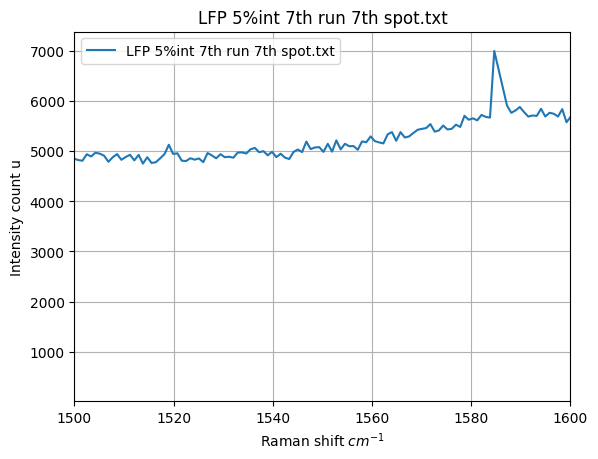

In [103]:
plt.xlim(1500,1600)
s = plotting(g7,0,3)

[ 92.1857 129.898   87.9821 ... 272.788  263.866  263.816 ]
[ 884.144  955.379 1026.46  ...  585.497  467.864  441.171]


/var/folders/n3/5krdr1g55tb1nzsqh0c1774h0000gn/T/ipykernel_58922/16725135.py:28: RuntimeWarning: invalid value encountered in log10
  plt.plot(x,np.log10(ex_y),)


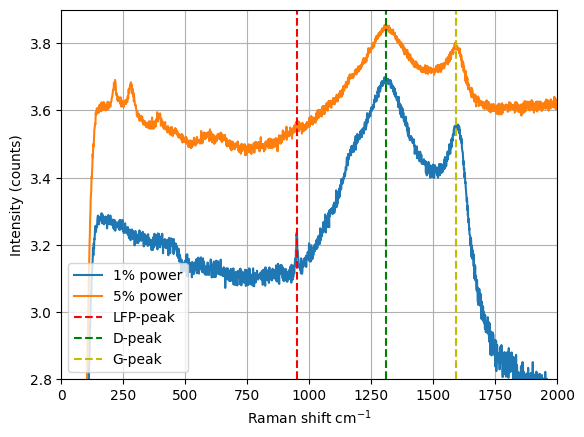

In [9]:
graph_1 = plotting("LFP 1%int 1st run.txt",10,3.5)
graph_2 = plotting("LFP 5%int 1st run.txt",10,3)
#graph_3 = plotting("LFP 10%int 2nd run different spot.txt",10,3)
plt.axvline(x=950, color='r', linestyle='--')
plt.axvline(x=1310, color='g', linestyle='--')
plt.axvline(x=1590, color='y', linestyle='--')
plt.title("")
plt.xlim(0,2000)
plt.ylim(2.8,3.9)
plt.legend(["1% power","5% power","LFP-peak","D-peak", "G-peak"])

high background, brehmstralung looking try and get rid of it. inelastic scattering this could be photoluminescence.

lorentzian plot to fit the curve with the different lorentzias plotted underneath it


[8083.01 8041.1  8249.37 ... 2989.58 2658.62 2358.82]


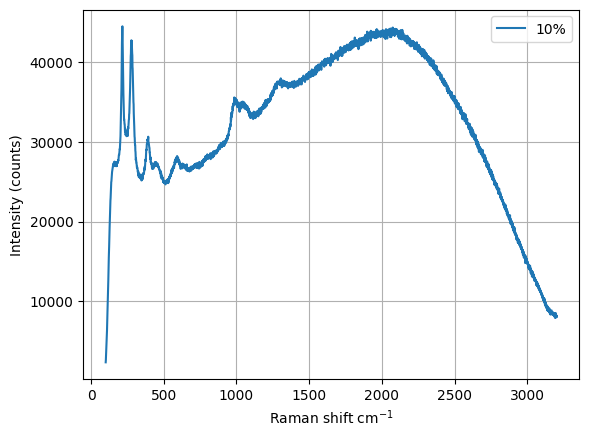

In [32]:
plt.grid()

graph_3 = plotting("LFP 10%int 1st run.txt",0,50)
plt.title("")
plt.legend(['10%'])
#plt.xlim(0,500)


#### 
Apparently this could be the part of $Fe_2O_3$ https://doi.org/10.1002/jrs.6403, due to the oxidation or partial oxidation of the material. 
2 dominating peaks at around 220-280, and a lower one around 400 

In [108]:
x,y = np.loadtxt("LFP 10%int 1st run.txt", unpack = True)

# Print x values where the corresponding y values are greater than 40000
#for i in range(len(y)):
#    if y[i] > 40000:
#        print(x[i])
        
# Find the index of the maximum value in y
max_index = np.argmax(y)

# Get the corresponding coordinates
max_x = x[max_index]
max_y = y[max_index]


# Get indices that would sort y in ascending order
sorted_indices = np.argsort(y)

# Get the index corresponding to the second-to-last value
second_highest_index = sorted_indices[-2]

# Get the corresponding coordinates
second_highest_x = x[second_highest_index]
second_highest_y = y[second_highest_index]

# Print the coordinates of the second-highest point
print(f"Coordinates of the second-highest point: ({second_highest_x}, {second_highest_y})")
# Print the coordinates of the highest point
print(f"Coordinates of the highest point: ({max_x}, {max_y})")

Coordinates of the second-highest point: (214.578, 44335.2)
Coordinates of the highest point: (215.684, 44454.4)


In [109]:

# Define the range of interest
i1 = 200  # Adjust this to your specific range
f1 = 220    # Adjust this to your specific range

i2 = 270
f2 = 290

def peak (x1,x2):
    
    # Find peaks within the specified range
    range_mask = (x >= x1) & (x <= x2)
    p, _ = find_peaks(y[range_mask])

    # Get the corresponding coordinates
    p_x = x[range_mask][p]
    p_y = y[range_mask][p]


    print("The corresponding peak coordinates are",p_x,p_y)
    print("The highest peak is at","x=", p_x[1],"y=", p_y[1])



    # Plot the original data
    plt.plot(x, y, label='Original Data')

    # Mark the peaks on the plot within the specified range
    plt.scatter(p_x, p_y, color='red', marker='x', label='Peaks in Range')

    # Show the plot
    plt.xlim(x1,x2)
    plt.grid()
    plt.legend()
    plt.show()


The corresponding peak coordinates are [227.835 215.684] [32833.5 44454.4]
The highest peak is at x= 215.684 y= 44454.4


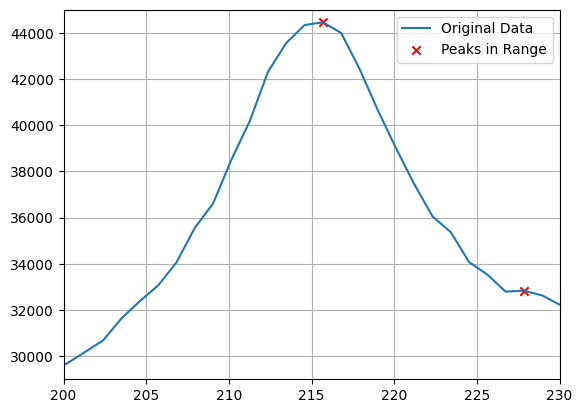

In [110]:
plt.ylim(29000,45000)
two = peak(200,230)

The corresponding peak coordinates are [279.467 277.279] [42601.5 42704.2]
The highest peak is at x= 277.279 y= 42704.2


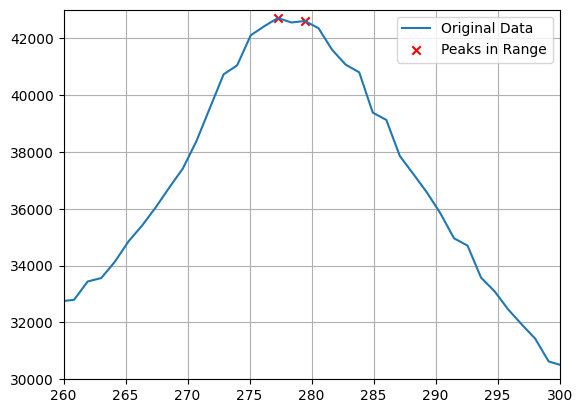

In [111]:
plt.ylim(30000,43000)
three = peak(260,300)

The corresponding peak coordinates are [403.882 393.17  387.806 383.512 380.289] [28638.  30622.2 30283.6 29732.4 29015.3]
The highest peak is at x= 393.17 y= 30622.2


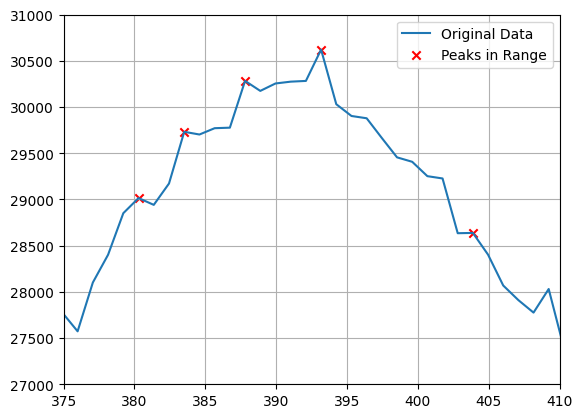

In [112]:
plt.ylim(27000,31000)
four = peak(375,410)


The corresponding peak coordinates are [608.809 606.745 600.547 598.48  596.412 594.343 592.273 589.167 586.06
 582.95  580.876 578.802 576.726 574.65  568.417 566.338 564.258 560.095
 556.971 553.846 550.718 548.632 545.502 543.414 540.281 537.146 532.964
 527.731 521.445 519.349 514.103 509.904 507.802 505.701 502.546] [27363.  27612.  27760.4 27994.4 27824.4 27947.  28190.3 28114.3 27932.2
 27834.6 27809.9 27635.7 27615.8 27427.3 27004.7 26874.5 26862.1 26505.9
 26647.2 26301.2 26430.4 26073.1 25859.7 25795.  25644.2 25613.1 25259.5
 25331.5 25162.5 25143.5 24996.2 24899.1 25051.6 25113.6 24952.2]
The highest peak is at x= 606.745 y= 27612.0


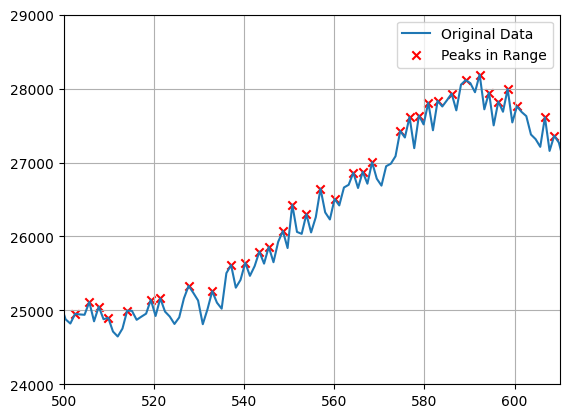

In [113]:
plt.ylim(24000,29000)
five = peak(500,610)


[8083.01 8041.1  8249.37 ... 2989.58 2658.62 2358.82]


(300.0, 800.0)

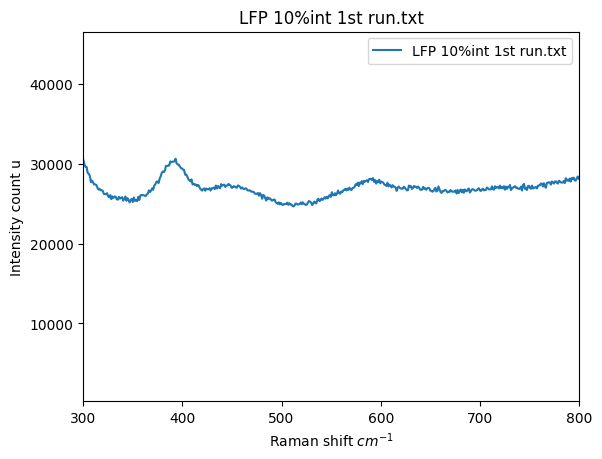

In [116]:
graph_3 = plotting("LFP 10%int 1st run.txt",0,80)
plt.grid()
plt.xlim(300,800)

In [ ]:
graph_3 = plotting("LFP 10%int 1st run.txt",0,80)
#plt.xlim(150,1450)
plt.grid()

#### 
Again this could be the doublet of the decomposed LFP particle at 990-1060 according to https://doi.org/10.1002/jrs.6403 this is due to $Li_3Fe_2(PO_4)_3$, the raise around 1300 could correspond to the $PO_4$ vibration as said in the literature??? we will see. it is an unkown phase or decomposition of oxided LFP, therefore suggestions need to be made and investigated.

[8083.01 8041.1  8249.37 ... 2989.58 2658.62 2358.82]


(1200.0, 1700.0)

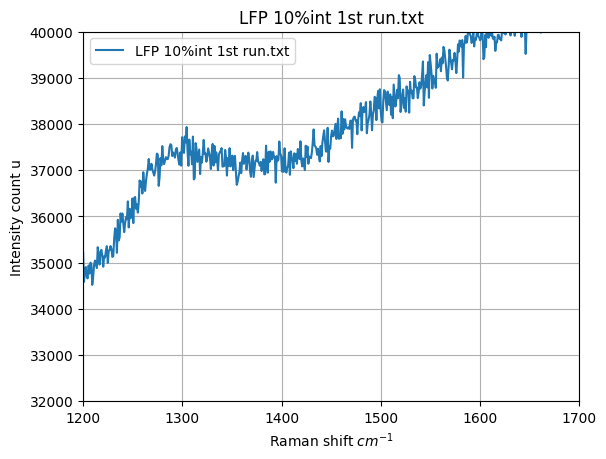

In [118]:
plt.ylim (32000,40000)
graph_3 = plotting("LFP 10%int 1st run.txt",0,75)
plt.xlim(1200,1700)

[8083.01 8041.1  8249.37 ... 2989.58 2658.62 2358.82]


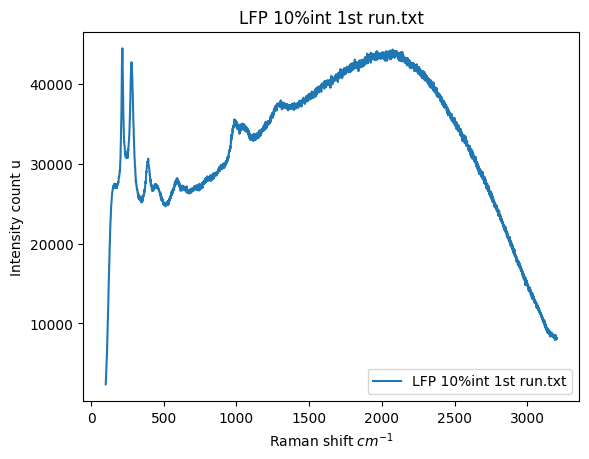

In [121]:
graph_3 = plotting("LFP 10%int 1st run.txt",0,80)
plt.grid()

In [122]:
def peak2 (x1,x2):
    
    # Find peaks within the specified range
    range_mask = (x >= x1) & (x <= x2)
    p, _ = find_peaks(y[range_mask])

    # Get the corresponding coordinates
    p_x = x[range_mask][p]
    p_y = y[range_mask][p]


    print("The corresponding peak coordinates are",p_x,p_y)
    print("The highest peak is at","x=", p_x[1],"y=", p_y[1])



    # Plot the original data
    plt.plot(x, y, label='Original Data')

    # Mark the peaks on the plot within the specified range
    plt.scatter(p_x, p_y, color='red', marker='x', label='Peaks in Range')

    # Show the plot
    plt.xlim(x1,x2)
    plt.grid()
    plt.legend()
    

    return plt.show(),p_x,p_y

The corresponding peak coordinates are [393.17  387.806 383.512 380.289 374.913 369.533 366.302 360.913 358.756
 355.519 353.36  351.2   349.04  344.716 342.553 339.307 336.059 331.725
 329.557 327.389 324.134 318.705 316.532 312.184 308.921] [30622.2 30283.6 29732.4 29015.3 27774.6 26910.2 26667.5 26058.1 26076.1
 25848.2 25400.8 25768.5 25596.8 25679.2 25891.4 25807.5 25846.  25893.4
 25892.8 26072.  26301.5 26681.7 26860.3 27394.1 27879.5]
The highest peak is at x= 387.806 y= 30283.6


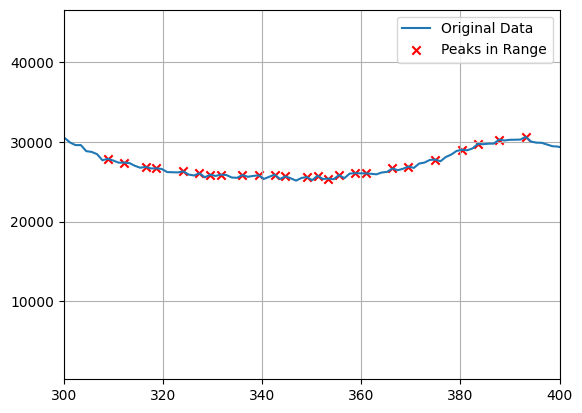

In [123]:
thi = peak2(300,400)

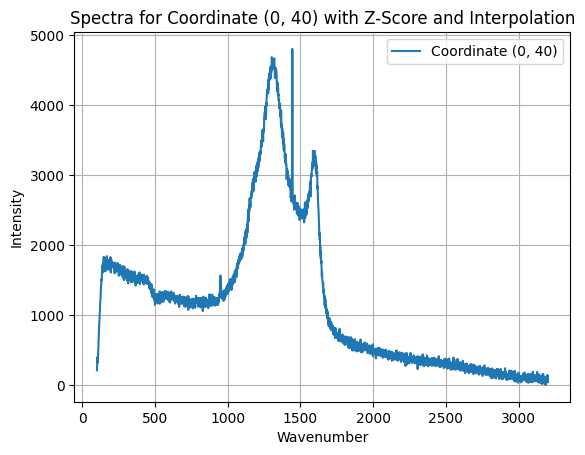

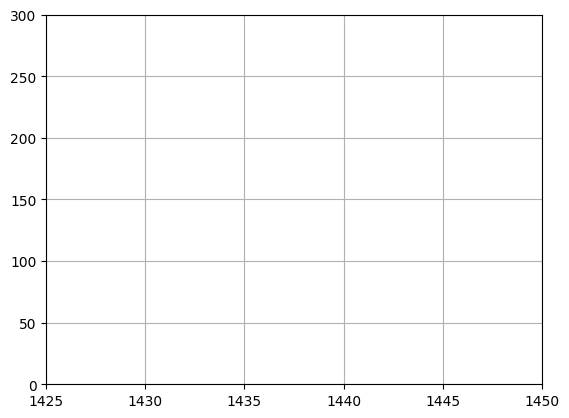

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from scipy.interpolate import interp1d

def plot_spectra(file_path, target_x, target_y, threshold):
    # Organize the data
    data_dict = {}
    with open(file_path, 'r') as file:
        for line in file.readlines():
            x, y, wavenumber, intensity = map(float, line.split())
            coordinate = (x, y)
            if coordinate not in data_dict:
                data_dict[coordinate] = []
            data_dict[coordinate].append((wavenumber, intensity))

    # Extract the spectra for the desired coordinates
    spectra = data_dict.get((target_x, target_y), [])
    if not spectra:
        print(f'No data found for coordinate ({target_x}, {target_y})')
#        return

    # Convert spectra to NumPy arrays for z-score calculation and interpolation
    wavenumbers, intensities = zip(*spectra)
    wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)

    # Calculate z-scores and remove outliers (considering values outside 3 standard deviations)
    gradient = np.gradient(intensities,wavenumbers)
    
    ##median_gradient = np.median(gradient)
    ##outliers = np.abs(gradient - median_gradient) > 2 * np.std(gradient)
    outliers = np.abs(gradient) < threshold
    
    #z_scores = zscore(intensities)
    #outliers = np.abs(z_scores) > threshold
    fw = wavenumbers[outliers]
    fi = intensities[outliers]
    #wavenumbers, intensities = wavenumbers[~outliers], intensities[~outliers]

    # Interpolate to fill gaps
    interpolate_function = interp1d(wavenumbers, intensities, kind='quadratic', fill_value='extrapolate')

    # Create a range of wavenumbers for smoother interpolation
    interpolated_wavenumbers = np.linspace(min(wavenumbers), max(wavenumbers), 3765)
    interpolated_intensities = interpolate_function(fw)

    # Plot the data
    plt.plot(fw, interpolated_intensities, label=f'Coordinate ({target_x}, {target_y})')
    
    
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Spectra for Coordinate ({target_x}, {target_y}) with Z-Score and Interpolation')
    plt.grid(True)
    plt.legend()
    plt.show()
    #plt.plot(wavenumbers,np.abs(gradient),'.')
    return
# Example usage:
#plt.xlim(0,2000)

#h = plot_spectra('trial map LFP 1%, 10 step 50x50.txt', 0, 0,3)
#h1=plot_spectra('trial map LFP 1%, 10 step 50x50.txt', 0, 10,3)
#h2=plot_spectra('trial map LFP 1%, 10 step 50x50.txt', 0, 20,3)
#h3=plot_spectra('trial map LFP 1%, 10 step 50x50.txt', 0, 30,3)

h4=plot_spectra('trial map LFP 1%, 10 step 50x50.txt', 0, 40,50)
#h4=plot_spectra('trial map LFP 1%, 10 step 50x50.txt', 0, 40,60)
#h5=plot_spectra('trial map LFP 1%, 10 step 50x50.txt', 0, 50,3)
plt.ylim(0,300)
plt.xlim(1425,1450)
plt.grid()


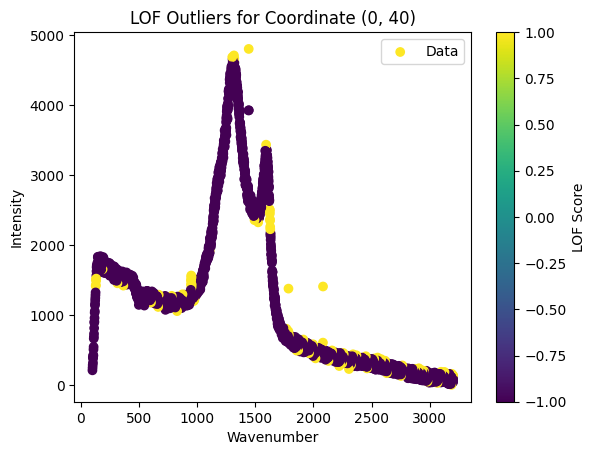

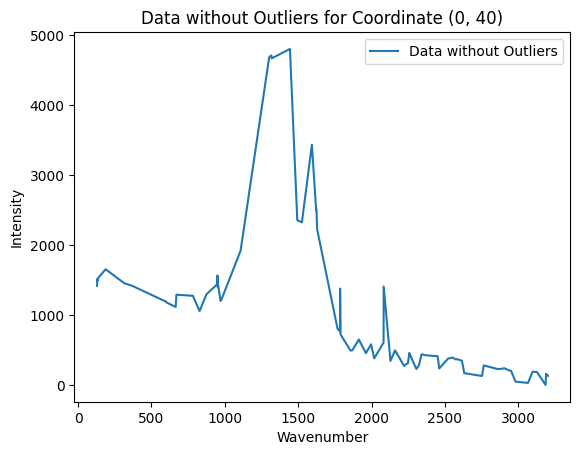

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

def plot_lof_outliers(file_path, target_x, target_y):
    # Organize the data
    data_dict = {}
    with open(file_path, 'r') as file:
        for line in file.readlines():
            x, y, wavenumber, intensity = map(float, line.split())
            coordinate = (x, y)
            if coordinate not in data_dict:
                data_dict[coordinate] = []
            data_dict[coordinate].append((wavenumber, intensity))

    # Extract the spectra for the desired coordinates
    spectra = data_dict.get((target_x, target_y), [])
    if not spectra:
        print(f'No data found for coordinate ({target_x}, {target_y})')
        return

    # Convert spectra to NumPy arrays for LOF calculation and plotting
    wavenumbers, intensities = zip(*spectra)
    X = np.column_stack((wavenumbers, intensities))

    # Calculate LOF scores
    lof = LocalOutlierFactor(n_neighbors=10)  # Adjust n_neighbors parameter
    lof_scores = -lof.fit_predict(X)

    # Plot the data with LOF scores
    plt.scatter(wavenumbers, intensities, c=lof_scores, cmap='viridis', label='Data')
    plt.colorbar(label='LOF Score')
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'LOF Outliers for Coordinate ({target_x}, {target_y})')
    plt.legend()
    plt.show()
    
    threshold = np.percentile(lof_scores, 10)  # Adjust the percentile as needed
    filtered_indices = lof_scores > threshold
    filtered_wavenumbers, filtered_intensities = np.array(wavenumbers)[filtered_indices], np.array(intensities)[filtered_indices]

    # Plot the data without outliers
    plt.plot(filtered_wavenumbers, filtered_intensities, label='Data without Outliers')
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Data without Outliers for Coordinate ({target_x}, {target_y})')
    plt.legend()
    plt.show()
# Example usage:
plot_lof_outliers('trial map LFP 1%, 10 step 50x50.txt', 0, 40)


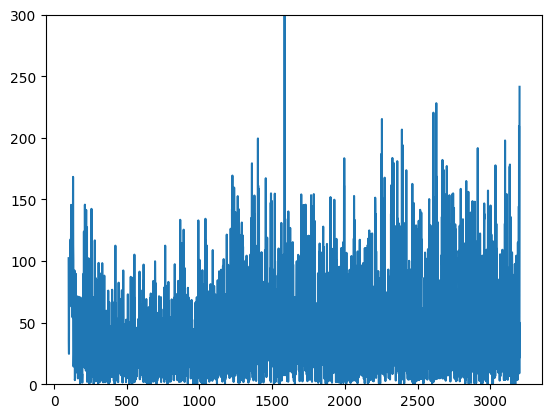

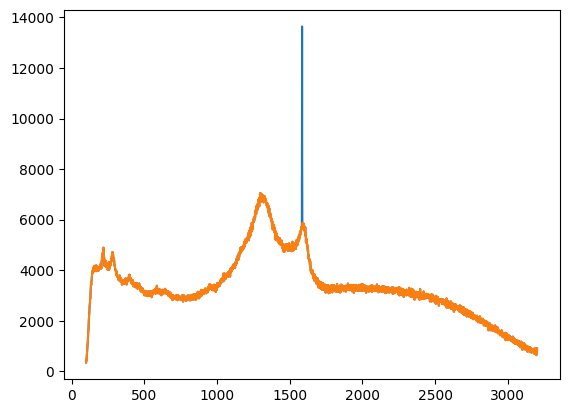

In [126]:
x, y = np.loadtxt(g7, unpack = True)
gradient = np.gradient(y, x)
plt.ylim(0,300)
plt.plot(x,np.abs(gradient))
plt.show()
plt.plot(x,y)

mask = np.abs(gradient) < 300
fx = x[mask]
fy = y[mask]

plt.plot(fx,fy)

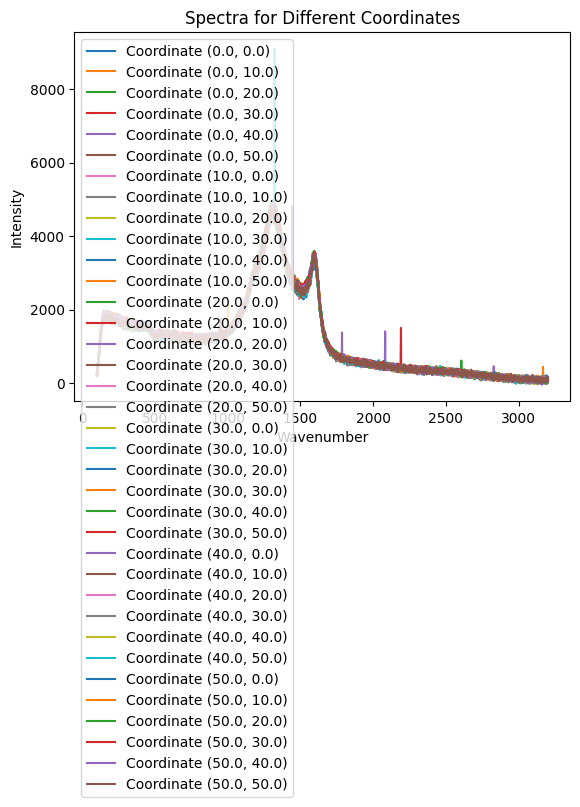

In [127]:


# Step 1: Read the data from the text file
file_path = 'trial map LFP 1%, 10 step 50x50.txt'

# Step 2: Organize the data
data_dict = {}
with open(file_path, 'r') as file:
    for line in file.readlines():
        x, y, wavenumber, intensity = map(float, line.split())
        coordinate = (x, y)
        if coordinate not in data_dict:
            data_dict[coordinate] = []
        data_dict[coordinate].append((wavenumber, intensity))

# Step 3: Plot the data
for coordinate, spectra in data_dict.items():
    wavenumbers, intensities = zip(*spectra)
    gradient = np.gradient(intensities, wavenumbers)
    wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
    mask = np.abs(gradient)<150
    fw = wavenumbers[mask]
    fi = intensities[mask]
    plt.plot(fw, fi, label=f'Coordinate {coordinate}')

plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Spectra for Different Coordinates')
plt.legend()
plt.show()


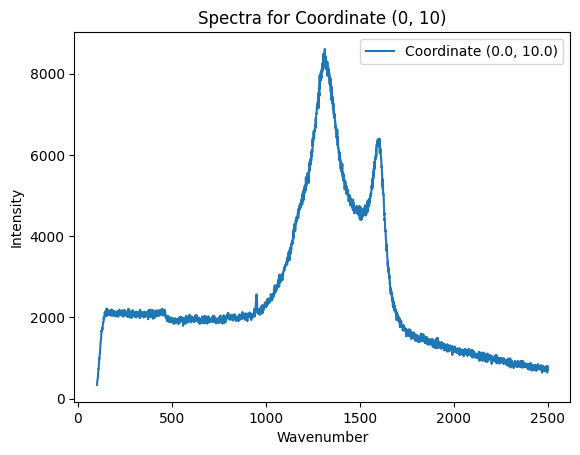

In [128]:
import matplotlib.pyplot as plt

def plot_spectra(file_path, target_x, target_y):
    # Organize the data
    data_dict = {}
    with open(file_path, 'r') as file:
        for line in file.readlines():
            x, y, wavenumber, intensity = map(float, line.split())
            coordinate = (x, y)
            if coordinate not in data_dict:
                data_dict[coordinate] = []
            data_dict[coordinate].append((wavenumber, intensity))

    # Plot the data for the desired coordinates
    for coordinate, spectra in data_dict.items():
        if coordinate[0] == target_x and coordinate[1] == target_y:
            wavenumbers, intensities = zip(*spectra)
            plt.plot(wavenumbers, intensities, label=f'Coordinate {coordinate}')

    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Spectra for Coordinate ({target_x}, {target_y})')
    plt.legend()
    plt.show()

    return plt.show()
# Example usage:
plot_spectra('LFP electrode map.txt', 0, 10)


[0.    0.    0.    ... 0.182 0.145 0.182]


(0.0, 9.0)

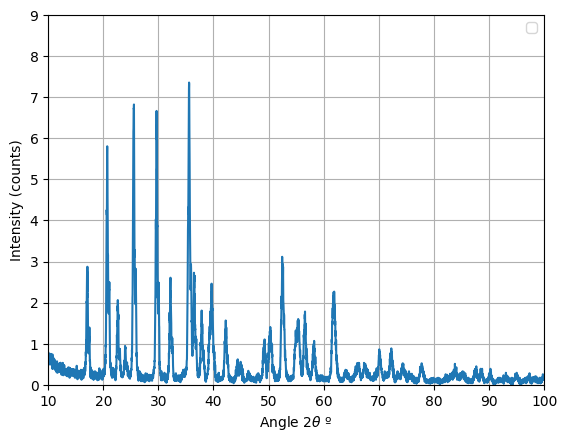

In [17]:
no_rot = plotting("LFP I 5-100 run no rotation_exported.xy", 0, 100000)
plt.title("")
plt.legend("")
plt.xlabel(r'Angle 2$\theta$ º')
plt.ylabel(r'Intensity (counts)')
plt.xlim(10,100)
plt.ylim(0,9)

Spinning disk XRD and stationary disk XRD yield roughly the same results for the spectra of LFP, therefore one method is as good as the other one.
$\theta$

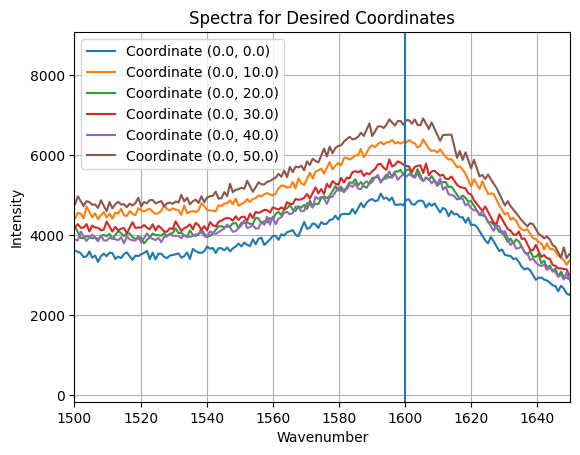

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the data from the text file
file_path = 'LFP electrode map.txt'

# Step 2: Organize the data
data_dict = {}
with open(file_path, 'r') as file:
    for line in file.readlines():
        x, y, wavenumber, intensity = map(float, line.split())
        coordinate = (x, y)
        if coordinate not in data_dict:
            data_dict[coordinate] = []
        data_dict[coordinate].append((wavenumber, intensity))

# Step 3: Plot the data for desired coordinates
target_coordinates = [(0, 0), (0, 10), (0, 20), (0, 30), (0, 40), (0, 50) ]

for coordinate, spectra in data_dict.items():
    if coordinate not in target_coordinates:
        continue  # Skip coordinates that are not in the target list

    wavenumbers, intensities = zip(*spectra)
    gradient = np.gradient(intensities, wavenumbers)
    wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
    mask = np.abs(gradient) < 130
    fw = wavenumbers[mask]
    fi = intensities[mask]
    plt.plot(fw, fi, label=f'Coordinate {coordinate}')

plt.axvline(x=1600)
plt.xlim(1500,1650)
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Spectra for Desired Coordinates')
plt.grid()
plt.legend()
plt.show()



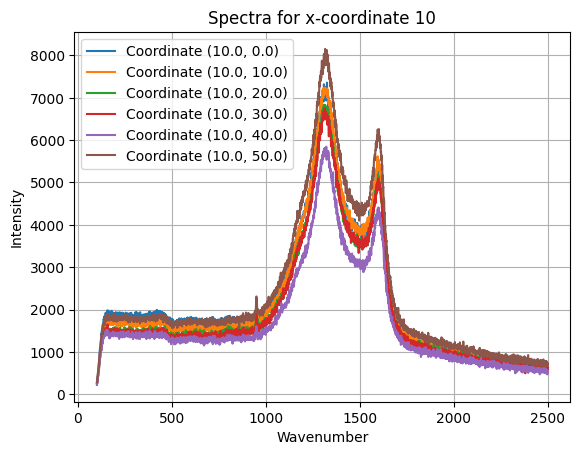

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectra_for_coordinate(file_path, target_x, threshold):
    # Organize the data
    data_dict = {}
    with open(file_path, 'r') as file:
        for line in file.readlines():
            x, y, wavenumber, intensity = map(float, line.split())
            coordinate = (x, y)
            if coordinate not in data_dict:
                data_dict[coordinate] = []
            data_dict[coordinate].append((wavenumber, intensity))

    # Plot the data for the specified x-coordinate
    for coordinate, spectra in data_dict.items():
        if coordinate[0] != target_x:
            continue  # Skip coordinates with different x

        wavenumbers, intensities = zip(*spectra)
        gradient = np.gradient(intensities, wavenumbers)
        wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
        mask = np.abs(gradient) < threshold
        fw = wavenumbers[mask]
        fi = intensities[mask]
        plt.plot(fw, fi, label=f'Coordinate {coordinate}')

    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Spectra for x-coordinate {target_x}')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage:
plot_spectra_for_coordinate('LFP electrode map.txt', 10, 130)


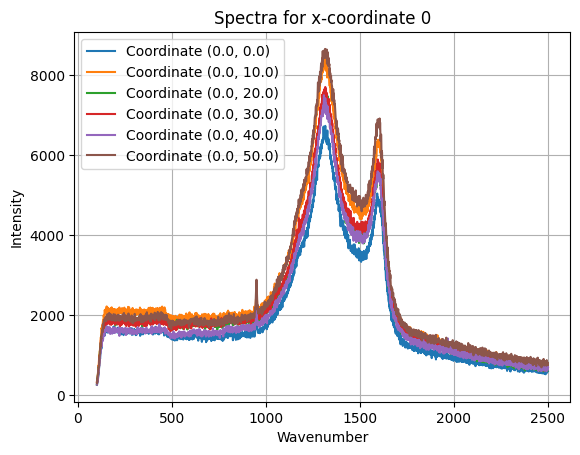

In [132]:
h = plot_spectra_for_coordinate('LFP electrode map.txt',0,130)

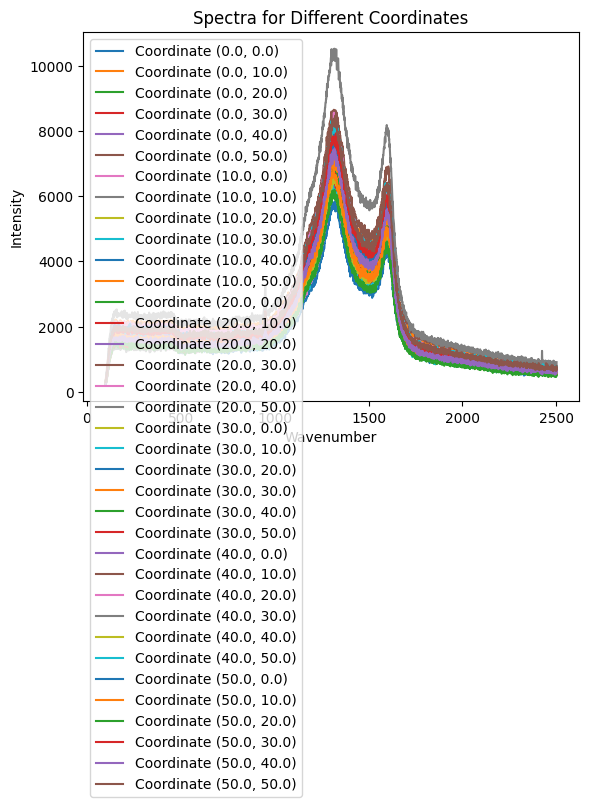

In [133]:


# Step 1: Read the data from the text file
file_path = 'LFP electrode map.txt'

# Step 2: Organize the data
data_dict = {}
with open(file_path, 'r') as file:
    for line in file.readlines():
        x, y, wavenumber, intensity = map(float, line.split())
        coordinate = (x, y)
        if coordinate not in data_dict:
            data_dict[coordinate] = []
        data_dict[coordinate].append((wavenumber, intensity))

# Step 3: Plot the data
for coordinate, spectra in data_dict.items():
    wavenumbers, intensities = zip(*spectra)
    gradient = np.gradient(intensities, wavenumbers)
    wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
    mask = np.abs(gradient)<130
    fw = wavenumbers[mask]
    fi = intensities[mask]
    plt.plot(fw, fi, label=f'Coordinate {coordinate}')

plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Spectra for Different Coordinates')
plt.legend()
plt.show()


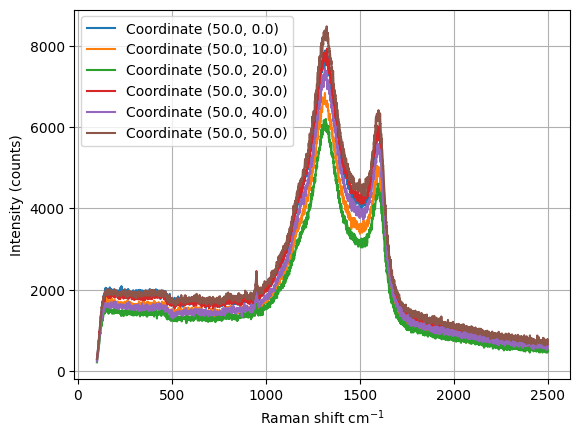

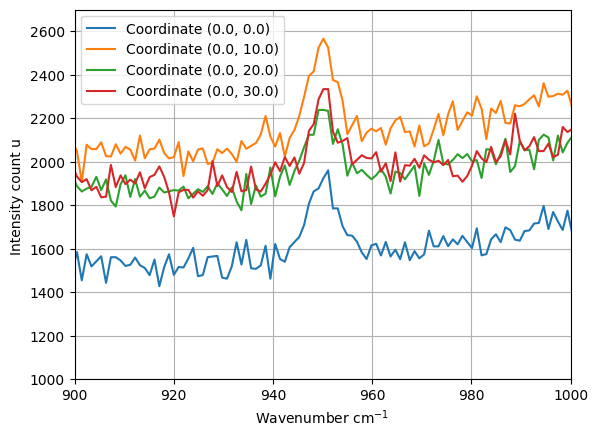

In [43]:
import numpy as np
import matplotlib.pyplot as plt

class SpectraPlotter:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data_dict = self._read_data()

    def _read_data(self):
        data_dict = {}
        with open(self.file_path, 'r') as file:
            for line in file.readlines():
                x, y, wavenumber, intensity = map(float, line.split())
                coordinate = (x, y)
                if coordinate not in data_dict:
                    data_dict[coordinate] = []
                data_dict[coordinate].append((wavenumber, intensity))
        return data_dict

    def plot_single(self, coordinate, threshold):
        # Plot the data for a single coordinate
        if coordinate not in self.data_dict:
            print(f'No data found for coordinate {coordinate}')
            return

        wavenumbers, intensities = zip(*self.data_dict[coordinate])
        gradient = np.gradient(intensities, wavenumbers)
        wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
        mask = np.abs(gradient) < threshold
        fw = wavenumbers[mask]
        fi = intensities[mask]
        plt.plot(fw, fi, label=f'Coordinate {coordinate}')

        plt.xlabel('Wavenumber cm$^{-1}$')
        plt.ylabel('Intensity count u ')
        plt.grid()
        plt.legend()
        plt.show()

    def plot_more(self, target_x, threshold):
        # Plot the data for the specified x-coordinate
        for coordinate, spectra in self.data_dict.items():
            if coordinate[0] != target_x:
                continue  # Skip coordinates with different x

            wavenumbers, intensities = zip(*spectra)
            gradient = np.gradient(intensities, wavenumbers)
            wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
            mask = np.abs(gradient) < threshold
            fw = wavenumbers[mask]
            fi = intensities[mask]
            plt.plot(fw, fi, label=f'Coordinate {coordinate}')

        plt.xlabel(r'Raman shift cm$^{-1}$')
        plt.ylabel('Intensity (counts)')
        plt.grid()
        plt.legend()
        plt.show()



    def plot_file(self, threshold,logarithmic=False):
         #Plot the data from the initialized file
        wavenumbers, intensities = self.data[:, 2], self.data[:, 3]
        gradient = np.gradient(intensities, wavenumbers)
        mask = np.abs(gradient) < threshold
        fw = wavenumbers[mask]
        fi = intensities[mask]

        plt.figure()
        if logarithmic:
            plt.semilogy(fw, fi, label='All Coordinates (Log Scale)')
        else:
            plt.plot(fw, fi, label='All Coordinates')

        plt.xlabel('Wavenumber cm$^{-1}$')
        plt.ylabel('Intensity count u ')
        plt.title('Spectra for All Coordinates')
        plt.legend()
        plt.show()
        
    def plot_data_without_outliers(self, target_coordinates, threshold):
        # Plot the data for desired coordinates without outliers
        for coordinate, spectra in self.data_dict.items():
            if coordinate not in target_coordinates:
                continue  # Skip coordinates that are not in the target list

            wavenumbers, intensities = zip(*spectra)
            gradient = np.gradient(intensities, wavenumbers)
            wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
            mask = np.abs(gradient) < threshold
            fw = wavenumbers[mask]
            fi = intensities[mask]
            plt.plot(fw, fi, label=f'Coordinate {coordinate}')
            

        plt.xlabel('Wavenumber cm$^{-1}$')
        plt.ylabel('Intensity count u ')
        plt.grid()
        plt.legend()
        plt.show()

# Example usage:
plt.title("")

spectra_plotter = SpectraPlotter('LFP electrode map.txt')

spectra_plotter.plot_more(50, 130)




#spectra_plotter.plot_file(130, logarithmic=False)  # Normal scale
#spectra_plotter.plot_file(130, logarithmic=True)   # Logarithmic scale

#coord = (0,30)
#spectra_plotter.plot_spectra_for_single_coordinate(coord,130)
plt.xlim(900,1000)
plt.ylim(1000,2700)
target_coordinates = [(0, 0), (0, 10), (0, 20), (0, 30)]
#c = peak2(900,1000)
spectra_plotter.plot_data_without_outliers(target_coordinates, 900)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


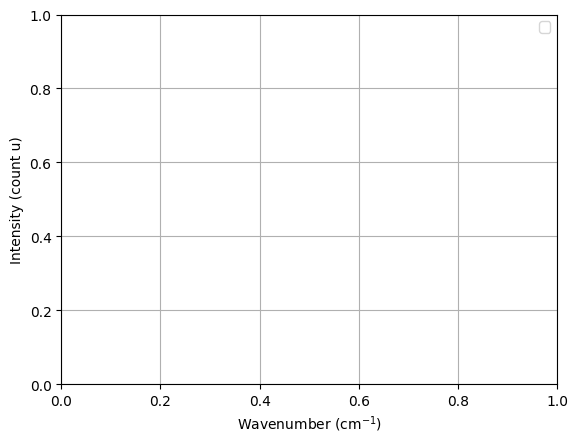

TypeError: expected str, bytes or os.PathLike object, not set

In [161]:
import numpy as np
import matplotlib.pyplot as plt

class DataPlotter:
        def __init__(self, file_path):
            self.file_path = file_path
            self.data_dict = self._read_data()

        def _read_data(self):
            data_dict = {}
            with open(self.file_path, 'r') as file:
                for line in file.readlines():
                    x, y, wavenumber, intensity = map(float, line.split())
                    coordinate = (x, y)
                    if coordinate not in data_dict:
                        data_dict[coordinate] = []
                    data_dict[coordinate].append((wavenumber, intensity))
            return data_dict  

        def find_highest_intensity(self, wavenumbers, intensities, wavenumber_range):
            # Filter wavenumbers and intensities within the specified range
            mask = (wavenumbers >= wavenumber_range[0]) & (wavenumbers <= wavenumber_range[1])
            filtered_wavenumbers = wavenumbers[mask]
            filtered_intensities = intensities[mask]

            # Find the index of the highest intensity within the range
            if len(filtered_intensities) > 0:  # Ensure there are points within the range
                max_intensity_index = np.argmax(filtered_intensities)
                max_wavenumber = filtered_wavenumbers[max_intensity_index]
                max_intensity = filtered_intensities[max_intensity_index]
                return max_wavenumber, max_intensity
            else:
                return None, None

        def plot_data_without_outliers(self, target_coordinates, threshold, wavenumber_range):
            # Plot the data for desired coordinates without outliers
            for coordinate, spectra in self.data_dict.items():
                if coordinate not in target_coordinates:
                    continue  # Skip coordinates that are not in the target list

            wavenumbers, intensities = zip(*spectra)
            gradient = np.gradient(intensities, wavenumbers)
            wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
            mask = np.abs(gradient) < threshold
            fw = wavenumbers[mask]
            fi = intensities[mask]
            plt.plot(fw, fi, label=f'Coordinate {coordinate}')

            # Find and mark the highest intensity value within the given range
            max_wavenumber, max_intensity = self.find_highest_intensity(fw, fi, wavenumber_range)
            if max_wavenumber is not None and max_intensity is not None:
                plt.scatter([max_wavenumber], [max_intensity], color='red', zorder=5)  # Ensure marker is on top
                plt.annotate(f'({max_wavenumber:.2f}, {max_intensity:.2f})',
                             (max_wavenumber, max_intensity),
                             textcoords="offset points",
                             xytext=(0,10),
                             ha='center')

        plt.xlabel('Wavenumber (cm$^{-1}$)')
        plt.ylabel('Intensity (count u)')
        plt.grid(True)
        plt.legend()
        plt.show()

# Example usage:
# Assuming data_dict is your dataset with the format {coordinate: [(wavenumber, intensity), ...]}
data_dict = {'LFP electrode map.txt'}  # Your data here
plotter = DataPlotter(data_dict)
target_coordinates = [(0,10),(0,20), (30,10)]  # Your target coordinates here
threshold = 50  # Your threshold for filtering outliers
wavenumber_range = (950, 1000)  # Example range, change as needed

plotter.plot_data_without_outliers(target_coordinates, threshold, wavenumber_range)


In [135]:
class SpectraPlotter2:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data_dict = self._read_data()

    def _read_data(self):
        data = np.loadtxt(self.file_path)
        if data.shape[1] == 2:
            # Two-column file: Assuming the first column is x-coordinate, the second is intensity
            data_dict = {}
            for x, intensity in data:
                coordinate = (x,)
                if coordinate not in data_dict:
                    data_dict[coordinate] = []
                data_dict[coordinate].append(intensity)
            return data_dict
        elif data.shape[1] == 4:
            # Four-column file: Assuming the first two columns are x and y coordinates,
            # and the third is wavenumber, the fourth is intensity
            data_dict = {}
            for x, y, wavenumber, intensity in data:
                coordinate = (x, y)
                if coordinate not in data_dict:
                    data_dict[coordinate] = []
                data_dict[coordinate].append((wavenumber, intensity))
            return data_dict
        else:
            raise ValueError("Invalid number of columns in the file. Supported: 2 or 4 columns.")
            
    def plot_single(self, coordinate, threshold):
        # Plot the data for a single coordinate
        if coordinate not in self.data_dict:
            print(f'No data found for coordinate {coordinate}')
            return

        wavenumbers, intensities = zip(*self.data_dict[coordinate])
        gradient = np.gradient(intensities, wavenumbers)
        wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
        mask = np.abs(gradient) < threshold
        fw = wavenumbers[mask]
        fi = intensities[mask]
        plt.plot(fw, fi, label=f'Coordinate {coordinate}')

        plt.xlabel('Wavenumber')
        plt.ylabel('Intensity')
        plt.title(f'Spectra for Coordinate {coordinate}')
        plt.grid()
        plt.legend()
        plt.show()

    def plot_more(self, target_x, threshold):
        # Plot the data for the specified x-coordinate
        for coordinate, spectra in self.data_dict.items():
            if coordinate[0] != target_x:
                continue  # Skip coordinates with different x

            wavenumbers, intensities = zip(*spectra)
            gradient = np.gradient(intensities, wavenumbers)
            wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
            mask = np.abs(gradient) < threshold
            fw = wavenumbers[mask]
            fi = intensities[mask]
            plt.plot(fw, fi, label=f'Coordinate {coordinate}')

        plt.xlabel('Wavenumber')
        plt.ylabel('Intensity')
        plt.title(f'Spectra for x-coordinate {target_x}')
        plt.grid()
        plt.legend()
        plt.show()


    def plot_spectra_from_file(self, threshold, logarithmic=False):
        # Plot the data from the initialized file
        for coordinate, spectra in self.data_dict.items():
            wavenumbers, intensities = zip(*spectra)
            gradient = np.gradient(intensities, wavenumbers)
            mask = np.abs(gradient) < threshold
            fw = wavenumbers[mask]
            fi = intensities[mask]

            plt.figure()
            if logarithmic:
                plt.semilogy(fw, fi, label=f'Coordinate {coordinate} (Log Scale)')
            else:
                plt.plot(fw, fi, label=f'Coordinate {coordinate}')

            plt.xlabel('Wavenumber')
            plt.ylabel('Intensity')
            plt.title(f'Spectra for Coordinate {coordinate}')
            plt.legend()
            plt.show()

# Example usage:
spectra_plotter = SpectraPlotter2('electrode LFP 50x full range 1% bright spot.txt')
spectra_plotter.plot_spectra_from_file(130, logarithmic=True)


TypeError: 'numpy.float64' object is not iterable

[ 67.0455 121.52   117.312  ... 339.331  266.091  274.908 ]


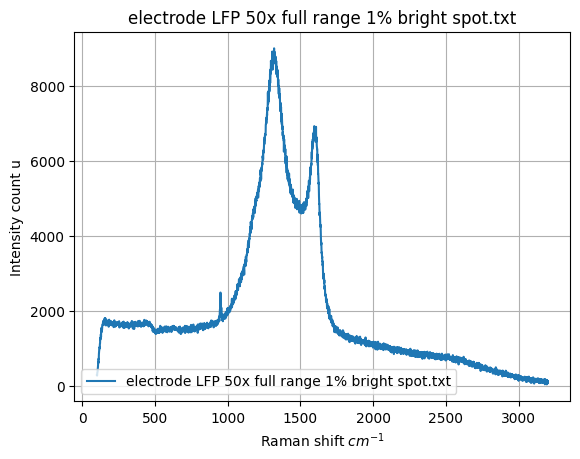

In [136]:
#plt.ylim(10000,16000)
h = plotting("electrode LFP 50x full range 1% bright spot.txt",0,35)
